In [1]:
import torch
from pprint import pprint
import pandas as pd
import cv2
from helpers import es_utils
from helpers import image_utils
from helpers import scanner
from elasticsearch import Elasticsearch
from sklearn.utils import shuffle
from helpers import scanner
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure()
from tensorflow.keras.applications.vgg19 import VGG19

2021-07-21 01:25:34.604112: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-21 01:25:34.604164: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<Figure size 432x288 with 0 Axes>

In [7]:
LEN_FEATURE = 1000
INDEX_NAME = 'image-classify-cnn'
ES_HOST = '10.1.32.130'
ES_PORT = '9200'
PATH_DATASET = './datasets/image_classify/main.xlsx'
PATH_TEST = './datasets/image_classify/test.xlsx'

CLASSES = {
    1: 'discharge record',
    2: 'driver licence',
    3: 'electric bill',
    4: 'resume',
    5: 'vehicle registration certificate',
    6: 'result covid test',
    7: 'thong bao tuyen sinh'
}

def get_class_name(class_id): return CLASSES[class_id]

def make_data(data: list, list_data, class_id):
    for item in list_data:
        data.append([item, class_id])
    return data

In [3]:
es = Elasticsearch([{'host': ES_HOST, 'port': ES_PORT}])
scanner = scanner.ScannerFindContours()
model = VGG19()

2021-07-21 01:25:36.083247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-21 01:25:36.083351: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-21 01:25:36.083379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pot-PC): /proc/driver/nvidia/version does not exist


574717952/574710816 [==============================] - 90s 0us/step


In [4]:
giay_ra_vien = image_utils.load_datasets('./datasets/image_classify/images/giay_ra_vien/')
giay_phep_lai_xe = image_utils.load_datasets('./datasets/image_classify/images/giay_phep_lai_xe/')
hoa_don_tien_dien = image_utils.load_datasets('./datasets/image_classify/images/hoa_don_tien_dien/')
cv = image_utils.load_datasets('./datasets/image_classify/images/cv/')
cavet_xe_may = image_utils.load_datasets('./datasets/image_classify/images/cavet_xe_may/')
result_covid_test = image_utils.load_datasets('./datasets/image_classify/images/result_covid_test/')
thong_bao_tuyen_sinh = image_utils.load_datasets('./datasets/image_classify/images/thong_bao_tuyen_sinh/')

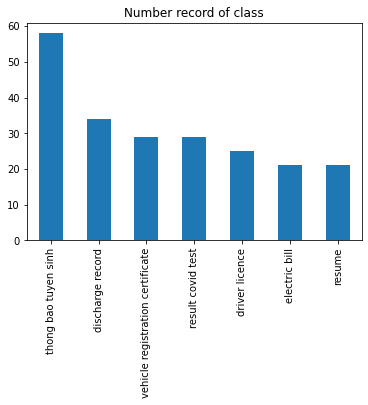

In [5]:
columns = ['image','class']
data = []

make_data(data, giay_ra_vien, 1)
make_data(data, giay_phep_lai_xe, 2)
make_data(data, hoa_don_tien_dien, 3)
make_data(data, cv, 4)
make_data(data, cavet_xe_may, 5)
make_data(data, result_covid_test, 6)
make_data(data, thong_bao_tuyen_sinh, 7)

df_show = pd.DataFrame(data, columns=columns)
df_show['class'] = df_show['class'].apply(get_class_name)
df_show['class'].value_counts().plot(kind="bar", title="Number record of class")
plt.show()

df = pd.DataFrame(data, columns=columns)
df = shuffle(df).reset_index(drop=True)
chia = len(df['image'])*80//100
df_train = df.iloc[:chia].reset_index(drop=True)
df_test = df.iloc[chia:].reset_index(drop=True)